# Budget Sales Data Analysis

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns; sns.set_theme()
import plotly.figure_factory as ff
from itertools import combinations
from collections import Counter
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling
### Data Gathering

In [2]:
# URL of the Excel file from GitHub
url = 'https://github.com/alokchoudhary05/Company-Budget-Sales-Project/raw/main/Company%20Budget%20Data/Database.xlsx'

In [3]:
Customers_data = pd.read_excel(url,
                              'Customers',
                              dtype={'CustomerKey':str},
                              parse_dates=['BirthDate','DateFirstPurchase']
                              )

In [4]:
Customers_data.head()

,CustomerKey,FirstName,LastName,FullName,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,DateFirstPurchase,CommuteDistance
0,11000,Jon,Yang,"Yang, Jon",1966-04-08,M,M,90000,2,0,Bachelors,Professional,1,0,3761 N. 14th St,2014-01-22,1-2 Miles
1,11001,Eugene,Huang,"Huang, Eugene",1965-05-14,S,M,60000,3,3,Bachelors,Professional,0,1,2243 W St.,2014-01-18,0-1 Miles
2,11002,Ruben,Torres,"Torres, Ruben",1965-08-12,M,M,60000,3,3,Bachelors,Professional,1,1,5844 Linden Land,2014-01-10,2-5 Miles
3,11003,Christy,Zhu,"Zhu, Christy",1968-02-15,S,F,70000,0,0,Bachelors,Professional,0,1,1825 Village Pl.,2014-01-01,5-10 Miles
4,11004,Elizabeth,Johnson,"Johnson, Elizabeth",1968-08-08,S,F,80000,5,5,Bachelors,Professional,1,4,7553 Harness Circle,2014-01-26,1-2 Miles


In [5]:
Product_data = pd.read_excel(url,
                            'Product',
                            dtype={'ProductKey':str},
                            parse_dates=['StartDate']
                            )

In [6]:
Product_data.head()

,ProductKey,ProductName,SubCategory,Category,StandardCost,Color,ListPrice,DaysToManufacture,ProductLine,ModelName,Photo,ProductDescription,StartDate
0,1,Adjustable Race,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,1998-06-01
1,2,Bearing Ball,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,1998-06-01
2,3,BB Ball Bearing,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,1998-06-01
3,4,Headset Ball Bearings,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,1998-06-01
4,5,Blade,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,http://www.avising.com/me/LearnPBI/DataSources...,NaN,1998-06-01


In [7]:
Sales_data = pd.read_excel(url,
                          'Sales',
                          dtype={'ProductKey':str,
                                'CustomerKey':str,
                                'PromotionKey':str,
                                'SalesTerritoryKey':str},
                          parse_dates=['OrderDate', 'ShipDate']
                          )
Sales_data['DateKey'] = Sales_data['OrderDate'].astype(str)

In [8]:
Sales_data.head()

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,StandardCost,List Price,Unnamed: 22,diif std cost,diff list price,DateKey
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.1350,...,0.0,NaN,-764.3184,NaN,2171.2942,3578.2700,NaN,0,0,2014-01-01
1,346,2014-01-01,2014-01-08,28389,1,7,SO43698,1,2,1699.9950,...,0.0,NaN,-424.3188,NaN,1912.1544,3399.9900,NaN,0,0,2014-01-01
2,346,2014-01-01,2014-01-08,25863,1,1,SO43699,1,2,1699.9950,...,0.0,NaN,-424.3188,NaN,1912.1544,3399.9900,NaN,0,0,2014-01-01
3,336,2014-01-01,2014-01-08,14501,1,4,SO43700,1,2,349.5491,...,0.0,NaN,-127.1944,NaN,413.1463,699.0982,NaN,0,0,2014-01-01
4,346,2014-01-01,2014-01-08,11003,1,9,SO43701,1,2,1699.9950,...,0.0,NaN,-424.3188,NaN,1912.1544,3399.9900,NaN,0,0,2014-01-01


In [9]:
Territory_data = pd.read_excel(url,
                              'Territory',
                              dtype={'SalesTerritoryKey':str}
                              )

In [10]:
Territory_data.head()

,SalesTerritoryKey,Region,Country,Group,RegionImage
0,1,Northwest,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
1,2,Northeast,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
2,3,Central,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
3,4,Southwest,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
4,5,Southeast,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...


### Merging data

In [11]:
temp_data = pd.merge(Sales_data, Product_data, on='ProductKey', how='inner')
df = pd.merge(temp_data, Customers_data, on='CustomerKey', how='inner')
df = pd.merge(df, Territory_data, on='SalesTerritoryKey', how='inner')

In [12]:
df.head()

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,...,Occupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,DateFirstPurchase,CommuteDistance,Region,Country,Group,RegionImage
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.1350,...,Management,1,3,601 Asilomar Dr.,2014-01-01,10+ Miles,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
1,600,2016-04-16,2016-04-23,21768,1,6,SO56212,1,1,539.9900,...,Management,1,3,601 Asilomar Dr.,2014-01-01,10+ Miles,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
2,310,2014-01-30,2014-02-06,21727,1,6,SO43833,1,4,894.5675,...,Skilled Manual,1,0,4082 Shell Ct,2014-01-30,1-2 Miles,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
3,479,2016-11-29,2016-12-05,21727,1,6,SO71614,2,1,8.9900,...,Skilled Manual,1,0,4082 Shell Ct,2014-01-30,1-2 Miles,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
4,477,2016-11-29,2016-12-05,21727,1,6,SO71614,3,1,4.9900,...,Skilled Manual,1,0,4082 Shell Ct,2014-01-30,1-2 Miles,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...


## Assessing data

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58189 entries, 0 to 58188
Data columns (total 58 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  object        
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  object        
 4   PromotionKey          58189 non-null  object        
 5   SalesTerritoryKey     58189 non-null  object        
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  Unnamed: 13     

In [14]:
# Check shape of the data after merging
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]} \n")

Number of Rows: 58189
Number of Columns: 58 



In [15]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
OrderDate,58189,2016-06-03 03:56:09.605939200,2014-01-01 00:00:00,2016-04-01 00:00:00,2016-07-07 00:00:00,2016-10-10 00:00:00,2016-12-30 00:00:00,NaN
ShipDate,58189,2016-06-10 04:03:24.657237760,2014-01-08 00:00:00,2016-04-08 00:00:00,2016-07-14 00:00:00,2016-10-17 00:00:00,2017-01-07 00:00:00,NaN
SalesOrderLineNumber,58189.0,1.887453,1.0,1.0,2.0,2.0,8.0,1.018829
OrderQuantity,58189.0,1.569386,1.0,1.0,1.0,2.0,4.0,1.047532
UnitPrice,58189.0,413.888218,0.5725,4.99,24.49,269.995,3578.27,833.052938
TotalProductCost,58189.0,296.539185,0.8565,3.3623,12.1924,343.6496,2171.2942,560.171436
SalesAmount,58189.0,503.66627,2.29,8.99,32.6,539.99,3578.27,941.462817
TaxAmt,58189.0,40.293303,0.1832,0.7192,2.608,43.1992,286.2616,75.317027
Unnamed: 13,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 14,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Check for duplicate data
df.duplicated().sum()

0

In [17]:
def null_value(df):
    # Calculate missing value count and percentage for each column
    missing_data = df.isnull().sum().to_frame(name='Null_value_count')
    missing_data['Percentage (%)'] = (missing_data['Null_value_count'] * 100 / df.shape[0]).round(2)

    # Reset the index and sort the data frame
    missing_data = missing_data.reset_index().rename(columns={'index': 'Column'})
    missing_data = missing_data.sort_values(by='Percentage (%)', ascending=False)

    return missing_data

In [18]:
null_value(df)

,Column,Null_value_count,Percentage (%)
22,Unnamed: 22,58189,100.00
19,Unnamed: 19,58189,100.00
14,Unnamed: 14,58189,100.00
13,Unnamed: 13,58189,100.00
17,Unnamed: 17,58189,100.00
30,Color,27442,47.16
0,ProductKey,0,0.00
42,MaritalStatus,0,0.00
41,BirthDate,0,0.00
39,LastName,0,0.00


In [19]:
#  Drop columns with nan values
df= df.dropna(axis=1)

In [20]:
null_value(df)

,Column,Null_value_count,Percentage (%)
0,ProductKey,0,0.0
1,OrderDate,0,0.0
28,ModelName,0,0.0
29,Photo,0,0.0
30,ProductDescription,0,0.0
31,StartDate,0,0.0
32,FirstName,0,0.0
33,LastName,0,0.0
34,FullName,0,0.0
35,BirthDate,0,0.0


### Adding columns

#### 1. Extracting Date Components

In [21]:
# Extracting Year from OrderDate
df['sale_year'] = df['OrderDate'].dt.year

# Extracting Month from OrderDate
df['sale_month'] = df['OrderDate'].dt.month

# Extracting Day from OrderDate
df['sale_day'] = df['OrderDate'].dt.day

# Extracting Day of Week from OrderDate
df['sale_week'] = df['OrderDate'].dt.dayofweek

# Extracting Day Name from OrderDate
df['sale_day_name'] = df['OrderDate'].dt.day_name()

# Extracting Year-Month from OrderDate
df['year_month'] = df['OrderDate'].apply(lambda x:x.strftime('%Y-%m'))

#### 2. Calculating Financial Data

In [22]:
# Calculate Total Invoice Amount
df['total_Invoice_amount'] = df['SalesAmount'] + df['TaxAmt']

# Considering only SalesAmount and Total Sales Amount to calculate profit
df['profit'] = (df['UnitPrice'] * df['OrderQuantity']) - df['TotalProductCost']

#### 3. String Manipulation

In [23]:
# Removing extra character from the string
df['ProductName'] = df['ProductName'].str.replace(',', '-')

#### 4. Calculating Age

In [24]:
# Calculate Age
df['Age'] = df['OrderDate'].dt.year - df['BirthDate'].dt.year

In [25]:
df.head()

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,...,RegionImage,sale_year,sale_month,sale_day,sale_week,sale_day_name,year_month,total_Invoice_amount,profit,Age
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.1350,...,http://www.avising.com/me/LearnPBI/DataSources...,2014,1,1,2,Wednesday,2014-01,3864.5316,1406.9758,68
1,600,2016-04-16,2016-04-23,21768,1,6,SO56212,1,1,539.9900,...,http://www.avising.com/me/LearnPBI/DataSources...,2016,4,16,5,Saturday,2016-04,583.1892,245.4103,70
2,310,2014-01-30,2014-02-06,21727,1,6,SO43833,1,4,894.5675,...,http://www.avising.com/me/LearnPBI/DataSources...,2014,1,30,3,Thursday,2014-01,3864.5316,1406.9758,41
3,479,2016-11-29,2016-12-05,21727,1,6,SO71614,2,1,8.9900,...,http://www.avising.com/me/LearnPBI/DataSources...,2016,11,29,1,Tuesday,2016-11,9.7092,5.6277,43
4,477,2016-11-29,2016-12-05,21727,1,6,SO71614,3,1,4.9900,...,http://www.avising.com/me/LearnPBI/DataSources...,2016,11,29,1,Tuesday,2016-11,5.3892,3.1237,43


## Exploring data
### Basic Overview

### List of product's category



In [26]:
df['Category'].unique().tolist()

['Bikes', 'Accessories', 'Clothing']

### List of product's subcategory

In [27]:
df['SubCategory'].unique().tolist()

['Road Bikes',
 'Mountain Bikes',
 'Bottles and Cages',
 'Gloves',
 'Tires and Tubes',
 'Helmets',
 'Touring Bikes',
 'Jerseys',
 'Cleaners',
 'Caps',
 'Hydration Packs',
 'Socks',
 'Fenders',
 'Vests',
 'Bike Racks',
 'Bike Stands',
 'Shorts']

### Analysing Unit Price

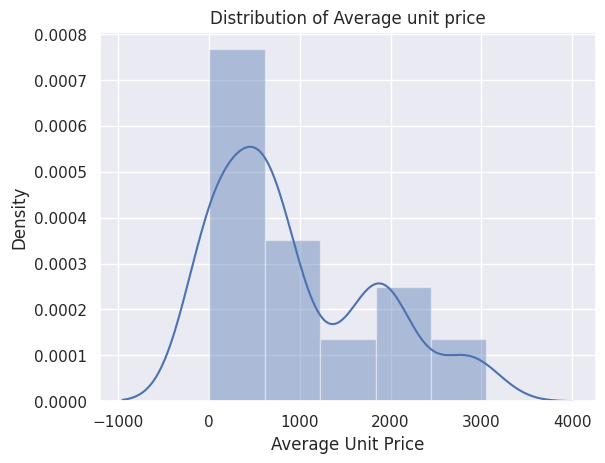

In [28]:
Avg_unit_price = df.groupby(['ProductKey'])['UnitPrice'].mean()
ax = sns.distplot(Avg_unit_price, kde=True, hist=True)
ax.set(title='Distribution of Average unit price',
       xlabel='Average Unit Price');

* Maximum of the product unit price is below $1000

### Sales order number distribution

In [29]:
n_orders = df.groupby(['CustomerKey'])['SalesOrderNumber'].nunique()
multi_orders_perc = np.sum(n_orders > 1)/df['CustomerKey'].nunique()
print(f"{100*multi_orders_perc:.2f}% of customers ordered more than once.")

36.97% of customers ordered more than once.


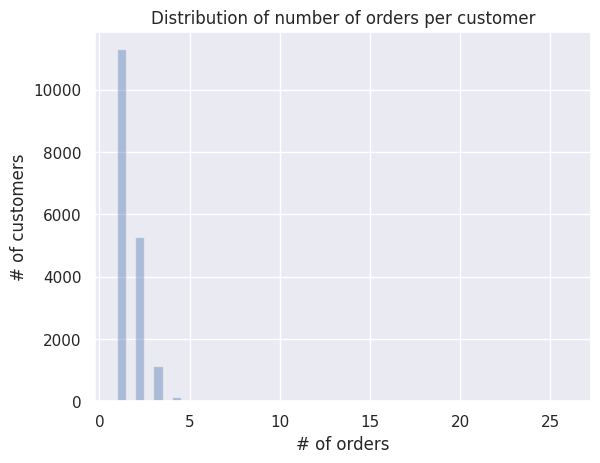

In [30]:
ax = sns.distplot(n_orders, kde=False)
ax.set(title='Distribution of number of orders per customer',
       xlabel='# of orders',
       ylabel='# of customers');

* 10000+ customers order first time in 2014, 2015, 2016.
* 5000+ repeted customers.

### Sales order line number distribution

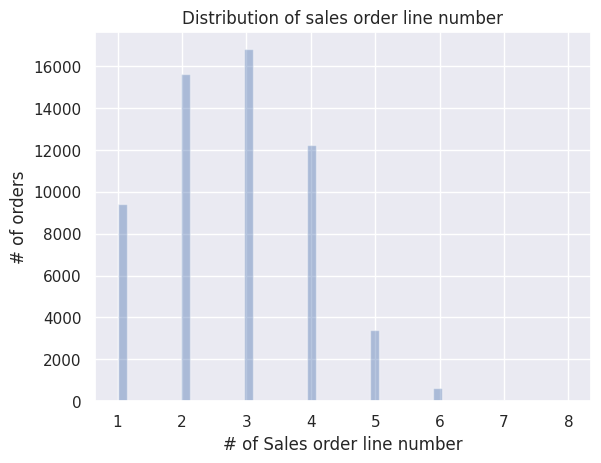

In [31]:
n_salesordernumber = df.groupby(['SalesOrderNumber'])['SalesOrderLineNumber'].transform('max')
ax = sns.distplot(n_salesordernumber, kde=False)
ax.set(title='Distribution of sales order line number',
       xlabel='# of Sales order line number',
       ylabel='# of orders');

* Most of the time **three to two** products are ordered in a single order

### Sales Order Quantity distribution

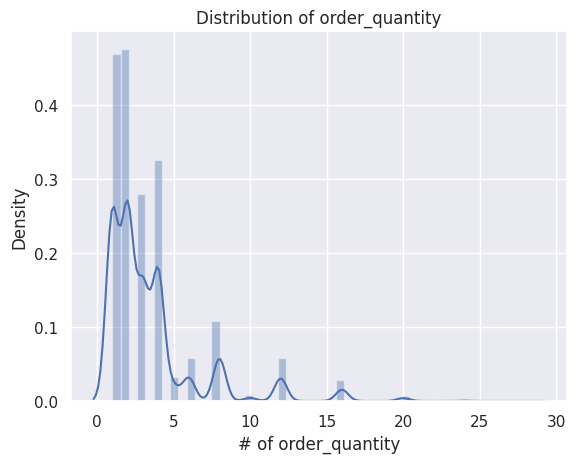

In [32]:
n_order_quantity = df.groupby(['SalesOrderNumber'])['OrderQuantity'].sum()
ax = sns.distplot(n_order_quantity, kde=True, hist=True)
ax.set(title='Distribution of order_quantity',
       xlabel='# of order_quantity',
       );

* Maximum quantity ordered for a product is below 5

### Age Distribution

In [33]:
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['agerange'] = pd.cut(df.Age, bins, labels = labels,include_lowest = True)

age_distribution = df['agerange'].value_counts().to_frame().reset_index()

age_distribution.columns = ['Age Range','Population count']

fig = px.bar(age_distribution, x='Age Range', y='Population count', color_discrete_sequence=['#374045'])
fig.update_layout(
    autosize=True,
    width=500,
    height=500,
    font=dict(size=10))
fig.show()

* A sizable portion of the clientele is made up of people between the ages of 40 and 59.

## Sales
### Year wise sales

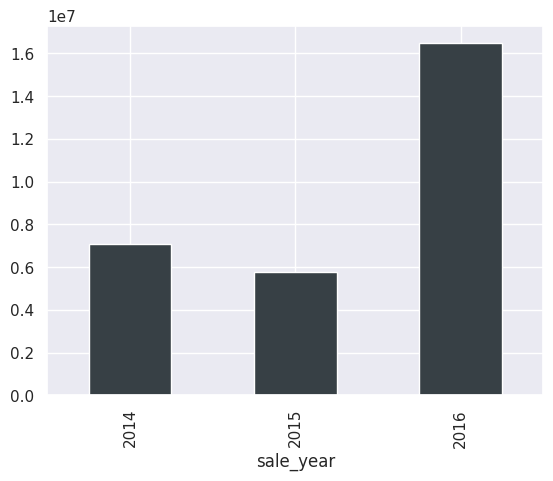

In [34]:
df.groupby('sale_year')['SalesAmount'].sum().plot(kind='bar', color='#374045');

* The year **2016** saw an exponential surge in sales

### Top 5 Selling Product

In [35]:
top_selling_product = df.groupby(['Category', 'SubCategory', 'ProductName'])['OrderQuantity'].sum().nlargest(5).to_frame()
top_selling_product

OrderQuantity
Category    SubCategory       ProductName                         
Accessories Bottles and Cages Water Bottle - 30 oz.           6370
            Tires and Tubes   Patch Kit/8 Patches             4705
                              Mountain Tire Tube              4551
                              Road Tire Tube                  3544
            Helmets           Sport-100 Helmet- Red           3398

In [36]:
top_selling_product.reset_index(inplace=True)
fig = px.bar(top_selling_product, x='ProductName', y='OrderQuantity',color_discrete_sequence=['#374045'])
fig.update_layout(
    autosize=True,
    width=500,
    height=300,
    margin=dict(
        l=25,
        r=25,
        b=10,
        t=10,
    ),
    font=dict(size=8))
fig.show()

### Quantity ordered based on category and subcategory from 2014 to 2016

In [37]:
cat_subcat_qty = df.groupby(['sale_year','Category', 'SubCategory'])['OrderQuantity'].sum().to_frame()
cat_subcat_qty = cat_subcat_qty.sort_values(['sale_year', 'Category'], ascending=True)
cat_subcat_qty.style.bar(subset=['OrderQuantity'], color='#D9B300')

### Country wise quantity ordered

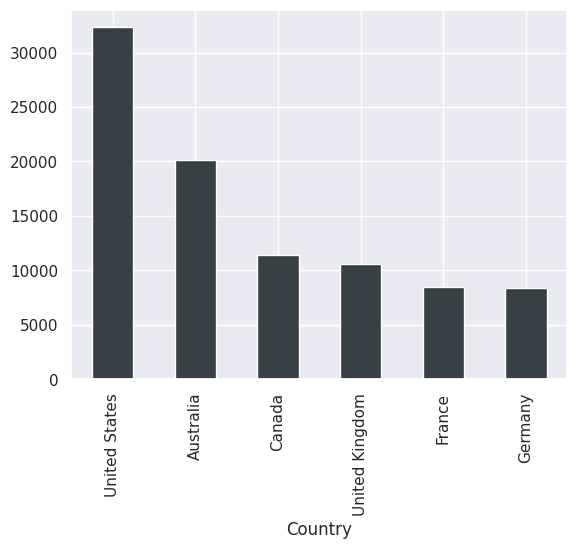

In [38]:
country_qty_sales = df.groupby('Country')['OrderQuantity'].sum().sort_values(ascending=False)
country_qty_sales.plot(kind='bar', color='#374045');

* High quantity of products is ordered from **Australia and United States**.

## Profit
### Overall profit based on order year, category and subcategory

In [39]:
cat_subcat_profit = df.groupby(['sale_year','Category', 'SubCategory'])['profit'].sum().to_frame()

#Sorting the results
cat_subcat_profit = cat_subcat_profit.sort_values(['sale_year', 'Category'], ascending=True)
cat_subcat_profit.style.bar(subset=['profit'], color='#D9B300')

* Major Profit is contributed by the Bike Category

### Low profit contributing product

In [40]:
df.groupby(['Category', 'SubCategory','ProductName'])['profit'].sum().nsmallest(10).to_frame()

profit
Category    SubCategory     ProductName                              
Clothing    Socks           Racing Socks- L                 1474.4574
                            Racing Socks- M                 1581.3837
Accessories Cleaners        Bike Wash - Dissolver           4299.8688
            Tires and Tubes Patch Kit/8 Patches             4314.8350
Clothing    Caps            AWC Logo Cap                    4331.8315
Accessories Tires and Tubes Touring Tire Tube               4363.8089
Clothing    Jerseys         Long-Sleeve Logo Jersey- XL     4495.6007
                            Short-Sleeve Classic Jersey- L  4544.8782
                            Long-Sleeve Logo Jersey- S      4610.5777
                            Short-Sleeve Classic Jersey- M  4793.2322

### Profitability by country

In [41]:
country_sales = pd.DataFrame(df.groupby('Country').sum(numeric_only=True)[['SalesAmount', 'profit']])
country_sales.reset_index(inplace=True)

fig = px.bar(country_sales, x='Country', y='profit',text_auto='.2s',color='SalesAmount',)

fig.update_layout(autosize=True, width=600, height=400,
    margin=dict(l=25, r=25, b=10, t=10), font=dict(size=8))
fig.show()

* High volume of profit is earned from **Australia and United States**.

## Question and Answers

## How efficient are the logistics?

In [42]:
# Adding manufacturing days to the order received date
df['OrderreadyDate'] = df['OrderDate'] + pd.to_timedelta(df['DaysToManufacture'], unit='D')

# Check the delay between order shipment date and order ready to supply
df['shipping_efficiency'] = (df['ShipDate'] - df['OrderreadyDate']).dt.days

fig = px.histogram(df, x="shipping_efficiency", color_discrete_sequence=['#374045'])
fig.update_layout(
    autosize=True,
    width=400,
    height=300,
    margin=dict(
        l=25,
        r=25,
        b=10,
        t=10,
    ),
    font=dict(size=10))
fig.show()

* The average order has a gap of 7 days between the day the order is ready for export from the factory and the date it was shipped
* Management must work to reduce this gap toward 3 days.

## What was the best month for sales? How much was earned that month ?

In [43]:
month_sales = df.groupby('sale_month').sum(numeric_only=True)[['SalesAmount', 'profit']]
month_sales.reset_index(inplace=True)
fig = px.bar(month_sales, x='sale_month', y='SalesAmount',text_auto='.2s',
             hover_data=['sale_month', 'SalesAmount'], color='profit',
             height=400)
fig.show()

* There are large profit transactions in the months of **June, November, and December**.

## What time should we display advertisement to maximize likelihood of customerls buying product?

In [44]:
sales_by_week = df.groupby(['sale_day_name']).count()['SalesAmount'].reset_index().sort_values('SalesAmount', ascending=False)

fig = px.line(sales_by_week, x='sale_day_name', y='SalesAmount', title='Sales Frequency by week')
fig.update_layout(
    autosize=True,
    width=500,
    height=400,
    margin=dict(
        l=25,
        r=25,
        b=10,
        t=10,
    ),
    font=dict(size=7))
fig.show()

* High sales orders are seen on **Wednesday and Saturday**, therefore we can promote our product during these workweek

## Which products are most often sold together?

In [45]:
# By setting keep on False, all duplicates are True since we only want repeated order number
dup_order = df[df['SalesOrderNumber'].duplicated(keep=False)]

In [46]:
# Group the data based on sales order number and product name because the products that bought together will have share same order number
dup_order['grouped'] = df.groupby('SalesOrderNumber')['ProductName'].transform(lambda x: ','.join(x))
dup_order = dup_order[['SalesOrderNumber', 'grouped']].drop_duplicates()

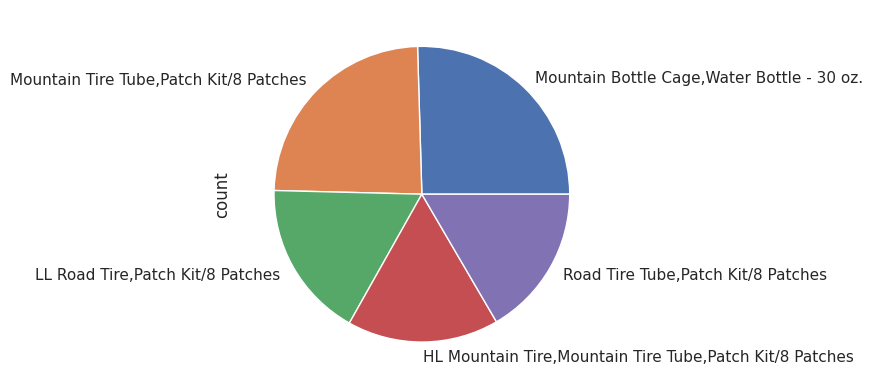

In [47]:
count = dup_order['grouped'].value_counts()[0:5].plot.pie()

* From the above pie diagram we can draw a conclusion that these products are mostly Purchased together.

In [48]:
count = Counter()

for row in dup_order['grouped']:
    row_list  = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('Mountain Bottle Cage', 'Water Bottle - 30 oz.') 1623
('Road Bottle Cage', 'Water Bottle - 30 oz.') 1513
('HL Mountain Tire', 'Mountain Tire Tube') 915
('Touring Tire', 'Touring Tire Tube') 758
('Mountain Tire Tube', 'Patch Kit/8 Patches') 737
('Mountain Tire Tube', 'ML Mountain Tire') 727
('Water Bottle - 30 oz.', 'AWC Logo Cap') 599
('Road Tire Tube', 'ML Road Tire') 580
('Road Tire Tube', 'Patch Kit/8 Patches') 556
('HL Road Tire', 'Road Tire Tube') 552


* The above product can be sold in a bundle or a combined package for discount.

## Which product sold the most? why do you think it sold the most?

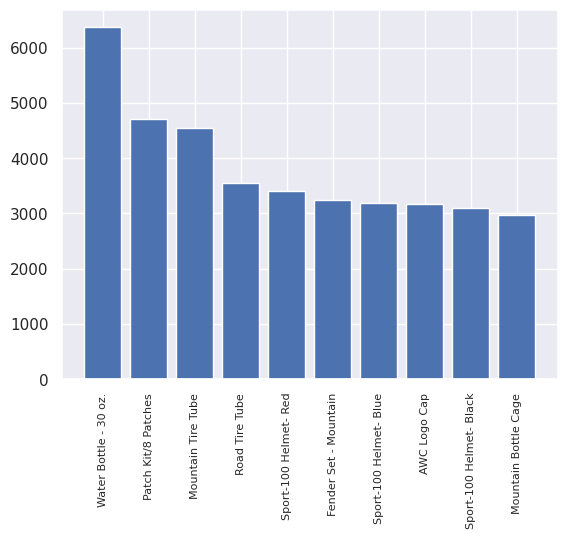

In [49]:
product_group = df.groupby('ProductName')
quantity_ordered = product_group['OrderQuantity'].sum().sort_values(ascending=False)[:10]
products = quantity_ordered.index.tolist()

plt.bar(products, quantity_ordered, )
plt.xticks(products, rotation='vertical', size=8)
plt.show()

In [50]:
# Convert 'UnitPrice' to numeric, handling errors
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')

# Calculate mean prices
prices = df.groupby('ProductName')['UnitPrice'].mean()

# Select prices for top products
prices = prices[products]

print(prices)

ProductName
Water Bottle - 30 oz.       4.107323
Patch Kit/8 Patches         1.888299
Mountain Tire Tube          4.119581
Road Tire Tube              3.236023
Sport-100 Helmet- Red      28.667388
Fender Set - Mountain      17.849201
Sport-100 Helmet- Blue     28.717150
AWC Logo Cap                7.503110
Sport-100 Helmet- Black    28.934376
Mountain Bottle Cage        8.296692
Name: UnitPrice, dtype: float64


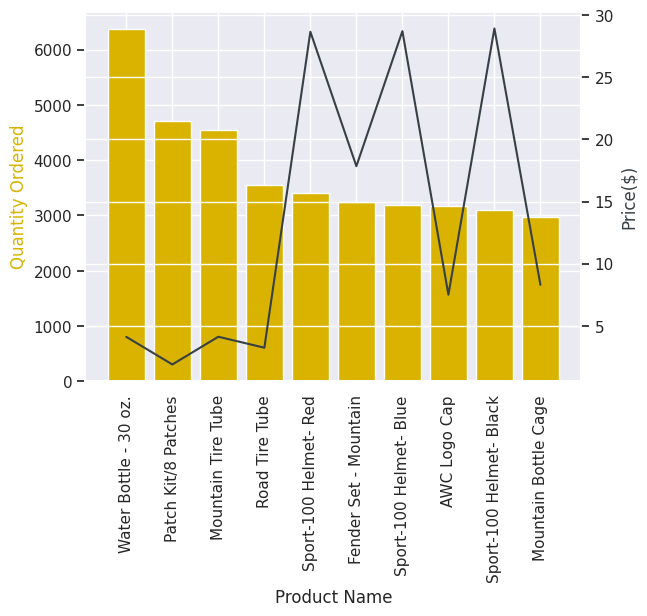

In [51]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='#D9B300')
ax2.plot(products, prices, '#374045')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='#D9B300')
ax2.set_ylabel('Price($)', color='#374045')
ax1.set_xticklabels(products, rotation='vertical')

plt.show();

In [52]:
prices.corr(quantity_ordered)

-0.5333019792658484

* There is a **high negative correlation** between **Price and number of Quantity ordered**.
* we can conclude that **low price product has high demand**

## Compare most ordered product by gender

In [53]:
male = df[df["Gender"]=="M"]
female = df[df["Gender"]=="F"]

In [54]:
male_ord_qty = male.groupby(['ProductName'],as_index=False)['OrderQuantity'].sum().nlargest(5,'OrderQuantity').sort_values('ProductName')
male_ord_qty.columns=['ProductName','Order_Qty_Male']

female_ord_qty = female.groupby(['ProductName'],as_index=False)['OrderQuantity'].sum().nlargest(5,'OrderQuantity').sort_values('ProductName')
female_ord_qty.columns=['ProductName','Order_Qty_Female']

df_merge = pd.merge(male_ord_qty, female_ord_qty, on='ProductName')

In [55]:
fig = px.line(df_merge, x="ProductName", y=["Order_Qty_Male","Order_Qty_Female"])
fig.update_layout(
    autosize=True,
    width=800,
    height=400)
fig.show()

## Does Gender and home ownership matter in order purchasing

In [56]:
fig = px.imshow(df.groupby(["Gender", "HouseOwnerFlag"])["SalesAmount"].mean().unstack(),
                labels=dict(color="Average Purchase"))
fig.update_layout(
    autosize=True,
    width=800,
    height=400)
fig.show()

* It's interesting to note that the average amount spent by men without permanent addresses is low, whilst the average amount spent by women without permanent addresses is higher.

## Number of childer and Purchase correlation

In [57]:
df_1 = df.groupby(["NumberChildrenAtHome"])["SalesAmount"].mean().to_frame()
df_1.reset_index(inplace=True)
fig = px.bar(df_1, x='NumberChildrenAtHome', y='SalesAmount',color_discrete_sequence=['#374045'])
fig.update_layout(
    autosize=False,
    width=500,
    height=300,
    margin=dict(
        l=25,
        r=25,
        b=10,
        t=10,
    ))
fig.show()

## Education, Occupation and Purchase correlation

In [58]:
fig = px.imshow(df.groupby(["Education", "Occupation"])["SalesAmount"].mean().unstack(),
                labels=dict(color="Average Purchase"))
fig.update_layout(
    autosize=False,
    width=700,
    height=400,
    margin=dict(
        l=25,
        r=25,
        b=10,
        t=10,
    ))
fig.show()

## Maritial Status single and above 50 age purchase

In [59]:
df_2 = df[(df['MaritalStatus']=='S')&(df['Age']>50)]

In [60]:
df_2 = df_2.groupby('agerange')['SalesAmount'].mean().to_frame().dropna()
df_2.reset_index(inplace=True)
fig = px.bar(df_2, x='agerange', y='SalesAmount', color_discrete_sequence=['#374045'])
fig.update_layout(
    autosize=False,
    width=500,
    height=300,
    margin=dict(
        l=25,
        r=25,
        b=10,
        t=10,
    ))
fig.show()

## Which age group has produced the most revenue?

In [61]:
df_3 = df.groupby('agerange')['SalesAmount'].mean().to_frame().dropna()
df_3.reset_index(inplace=True)
fig = px.bar(df_3, x='agerange', y='SalesAmount', color_discrete_sequence=['#374045'])
fig.update_layout(
    autosize=False,
    width=500,
    height=300,
    margin=dict(
        l=25,
        r=25,
        b=10,
        t=10,
    ))
fig.show()

## Yearly income range and purchase correlation

In [62]:
def create_bins(lower_bound, width, quantity):
    """ create_bins returns an equal-width (distance) partitioning.
        It returns an ascending list of tuples, representing the intervals.
        A tuple bins[i], i.e. (bins[i][0], bins[i][1])  with i > 0
        and i < quantity, satisfies the following conditions:
            (1) bins[i][0] + width == bins[i][1]
            (2) bins[i-1][0] + width == bins[i][0] and
                bins[i-1][1] + width == bins[i][1]
    """


    bins = []
    for low in range(lower_bound,
                     lower_bound + quantity*width + 1, width):
        bins.append((low, low+width))
    return bins

In [63]:
bins = create_bins(lower_bound=10000,
                   width=30000,
                   quantity=5)
bins2 = pd.IntervalIndex.from_tuples(bins)
df['salary_range'] = pd.cut(df['YearlyIncome'], bins2)

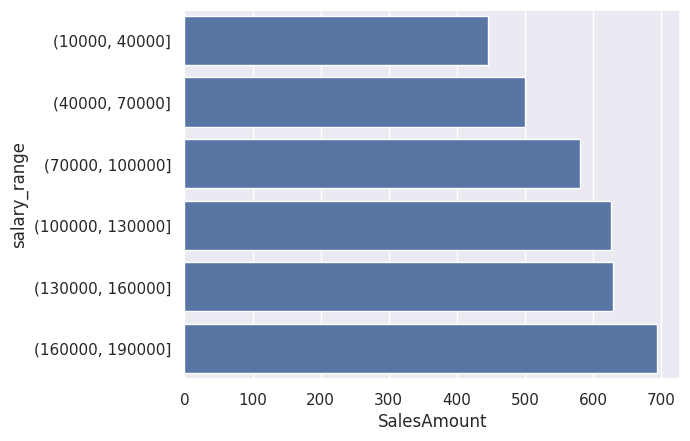

In [64]:
df_4 = df.groupby('salary_range')['SalesAmount'].mean().to_frame()
df_4.reset_index(inplace=True)
sns.barplot(x="SalesAmount", y="salary_range", data=df_4);

* High salary range leads to increase in purchase

## Paritial high school vs bachlors income mean and most ordered product

In [65]:
df_6 = df[(df['Education']=='Partial High School')|(df['Education']=='Bachelors')].groupby('Education')['YearlyIncome'].mean().to_frame()

In [66]:
df_6.reset_index(inplace=True)
fig = px.bar(df_6, x='Education', y='YearlyIncome')
fig.update_layout(
    autosize=False,
    width=500,
    height=300,
    margin=dict(
        l=25,
        r=25,
        b=10,
        t=10,
    ))
fig.show()

In [67]:
df_7 = df[(df['Education']=='Partial High School')|(df['Education']=='Bachelors')]
df_7 = df_7.groupby(['Education','ProductName'])['OrderQuantity'].mean().to_frame().sort_values('OrderQuantity', ascending=False)[:10]
df_7.reset_index(inplace=True)
fig = px.bar(df_7, x="Education",
             y="OrderQuantity", color="ProductName",
             title="Paritial high school vs bachlors expense analysis",
             barmode="group")
fig.show()

* Customers with a **high school diploma and modest annual income buy more products** than people with bachelor's degrees

# Customer Segmentation

* RFM stands for recency, frequency, monetary value.
* In business analytics, we often use this concept to divide
customers into different segments, like high-value customers,
medium value customers or low-value customers, and similarly many others.

* Recency: How recently has the customer made a transaction with us
* Frequency: How frequent is the customer in ordering/buying some product from us
* Monetary: How much does the customer spend on purchasing products from us

In [68]:
#  calculating recency for customers who had made a purchase with a company

df_recency = df.groupby(by='FullName',
                        as_index=False)['OrderDate'].max()
df_recency.columns = ['CustomerName', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)

In [69]:
#  calculating the frequency of frequent transactions of the
#  customer in ordering/buying some product from the company.

frequency_df = df.drop_duplicates().groupby(
    by=['FullName'], as_index=False)['OrderDate'].count()
frequency_df.columns = ['CustomerName', 'Frequency']
# frequency_df.head()

In [70]:
monetary_df = df.groupby(by='FullName', as_index=False)['SalesAmount'].sum()
monetary_df.columns = ['CustomerName', 'Monetary']
# monetary_df.head()

In [71]:
# merging dataset
rf_df = df_recency.merge(frequency_df, on='CustomerName')
rfm_df = rf_df.merge(monetary_df, on='CustomerName').drop(
    columns='LastPurchaseDate')
# rfm_df.head()

In [72]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

# rfm_df.head()

In [73]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
# rfm_df[['CustomerName', 'RFM_Score']].head(7)

In [74]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
# rfm_df[['CustomerName', 'RFM_Score', 'Customer_segment']].head(20)

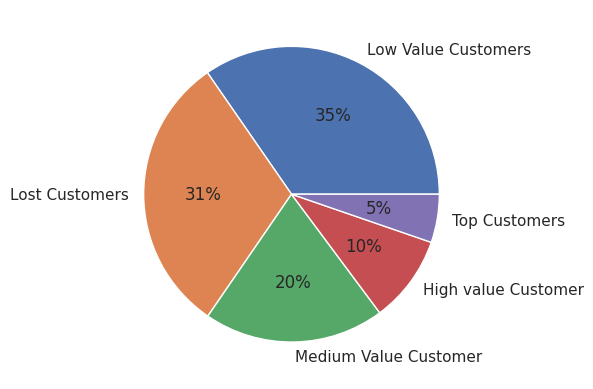

In [75]:
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

* According to the customer segmentation described above, approximately **15% of our clients are high value clients**, whereas the **majority of our clientele are low value and lost clients**

# Cohort Analysis

In [76]:
# create an invoice month

# Function for month
def get_month(x):
  return dt.datetime(x.year, x.month,1)

# apply the function
df['InvoiceMonth'] = df['OrderDate'].apply(get_month)
# create a column index with the minimum invoice date aka first time customer was aquired
df['CohortMonth'] = df.groupby('CustomerKey')['InvoiceMonth'].transform('min')

In [77]:
# create a date element function to get a series for subtranction
def get_date_elements(data,column):
  day = data[column].dt.day
  month = data[column].dt.month
  year = data[column].dt.year
  return day, month, year

In [78]:
# get date elements for our cohort and invoice columns(one dimentional Series)
_, Invoice_month, Invoice_year = get_date_elements(df, 'InvoiceMonth')
_, Cohort_month, Cohort_year = get_date_elements(df, 'CohortMonth')

# create a cohort index
year_diff = Invoice_year - Cohort_year
month_diff = Invoice_month - Cohort_month
df['CohortIndex'] = year_diff*12+month_diff+1

# count the customer ID by grouping by Cohort Month and Cohort index
cohort_data = df.groupby(['CohortMonth','CohortIndex'])['CustomerKey'].apply(pd.Series.nunique).reset_index()

# create pivot table
cohort_table = cohort_data.pivot(index='CohortMonth', columns=['CohortIndex'],values='CustomerKey')

# change index
cohort_table.index = cohort_table.index.strftime('%B %Y')

# cohort table for percentage
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0],axis=0)

<Axes: xlabel='CohortIndex', ylabel='CohortMonth'>

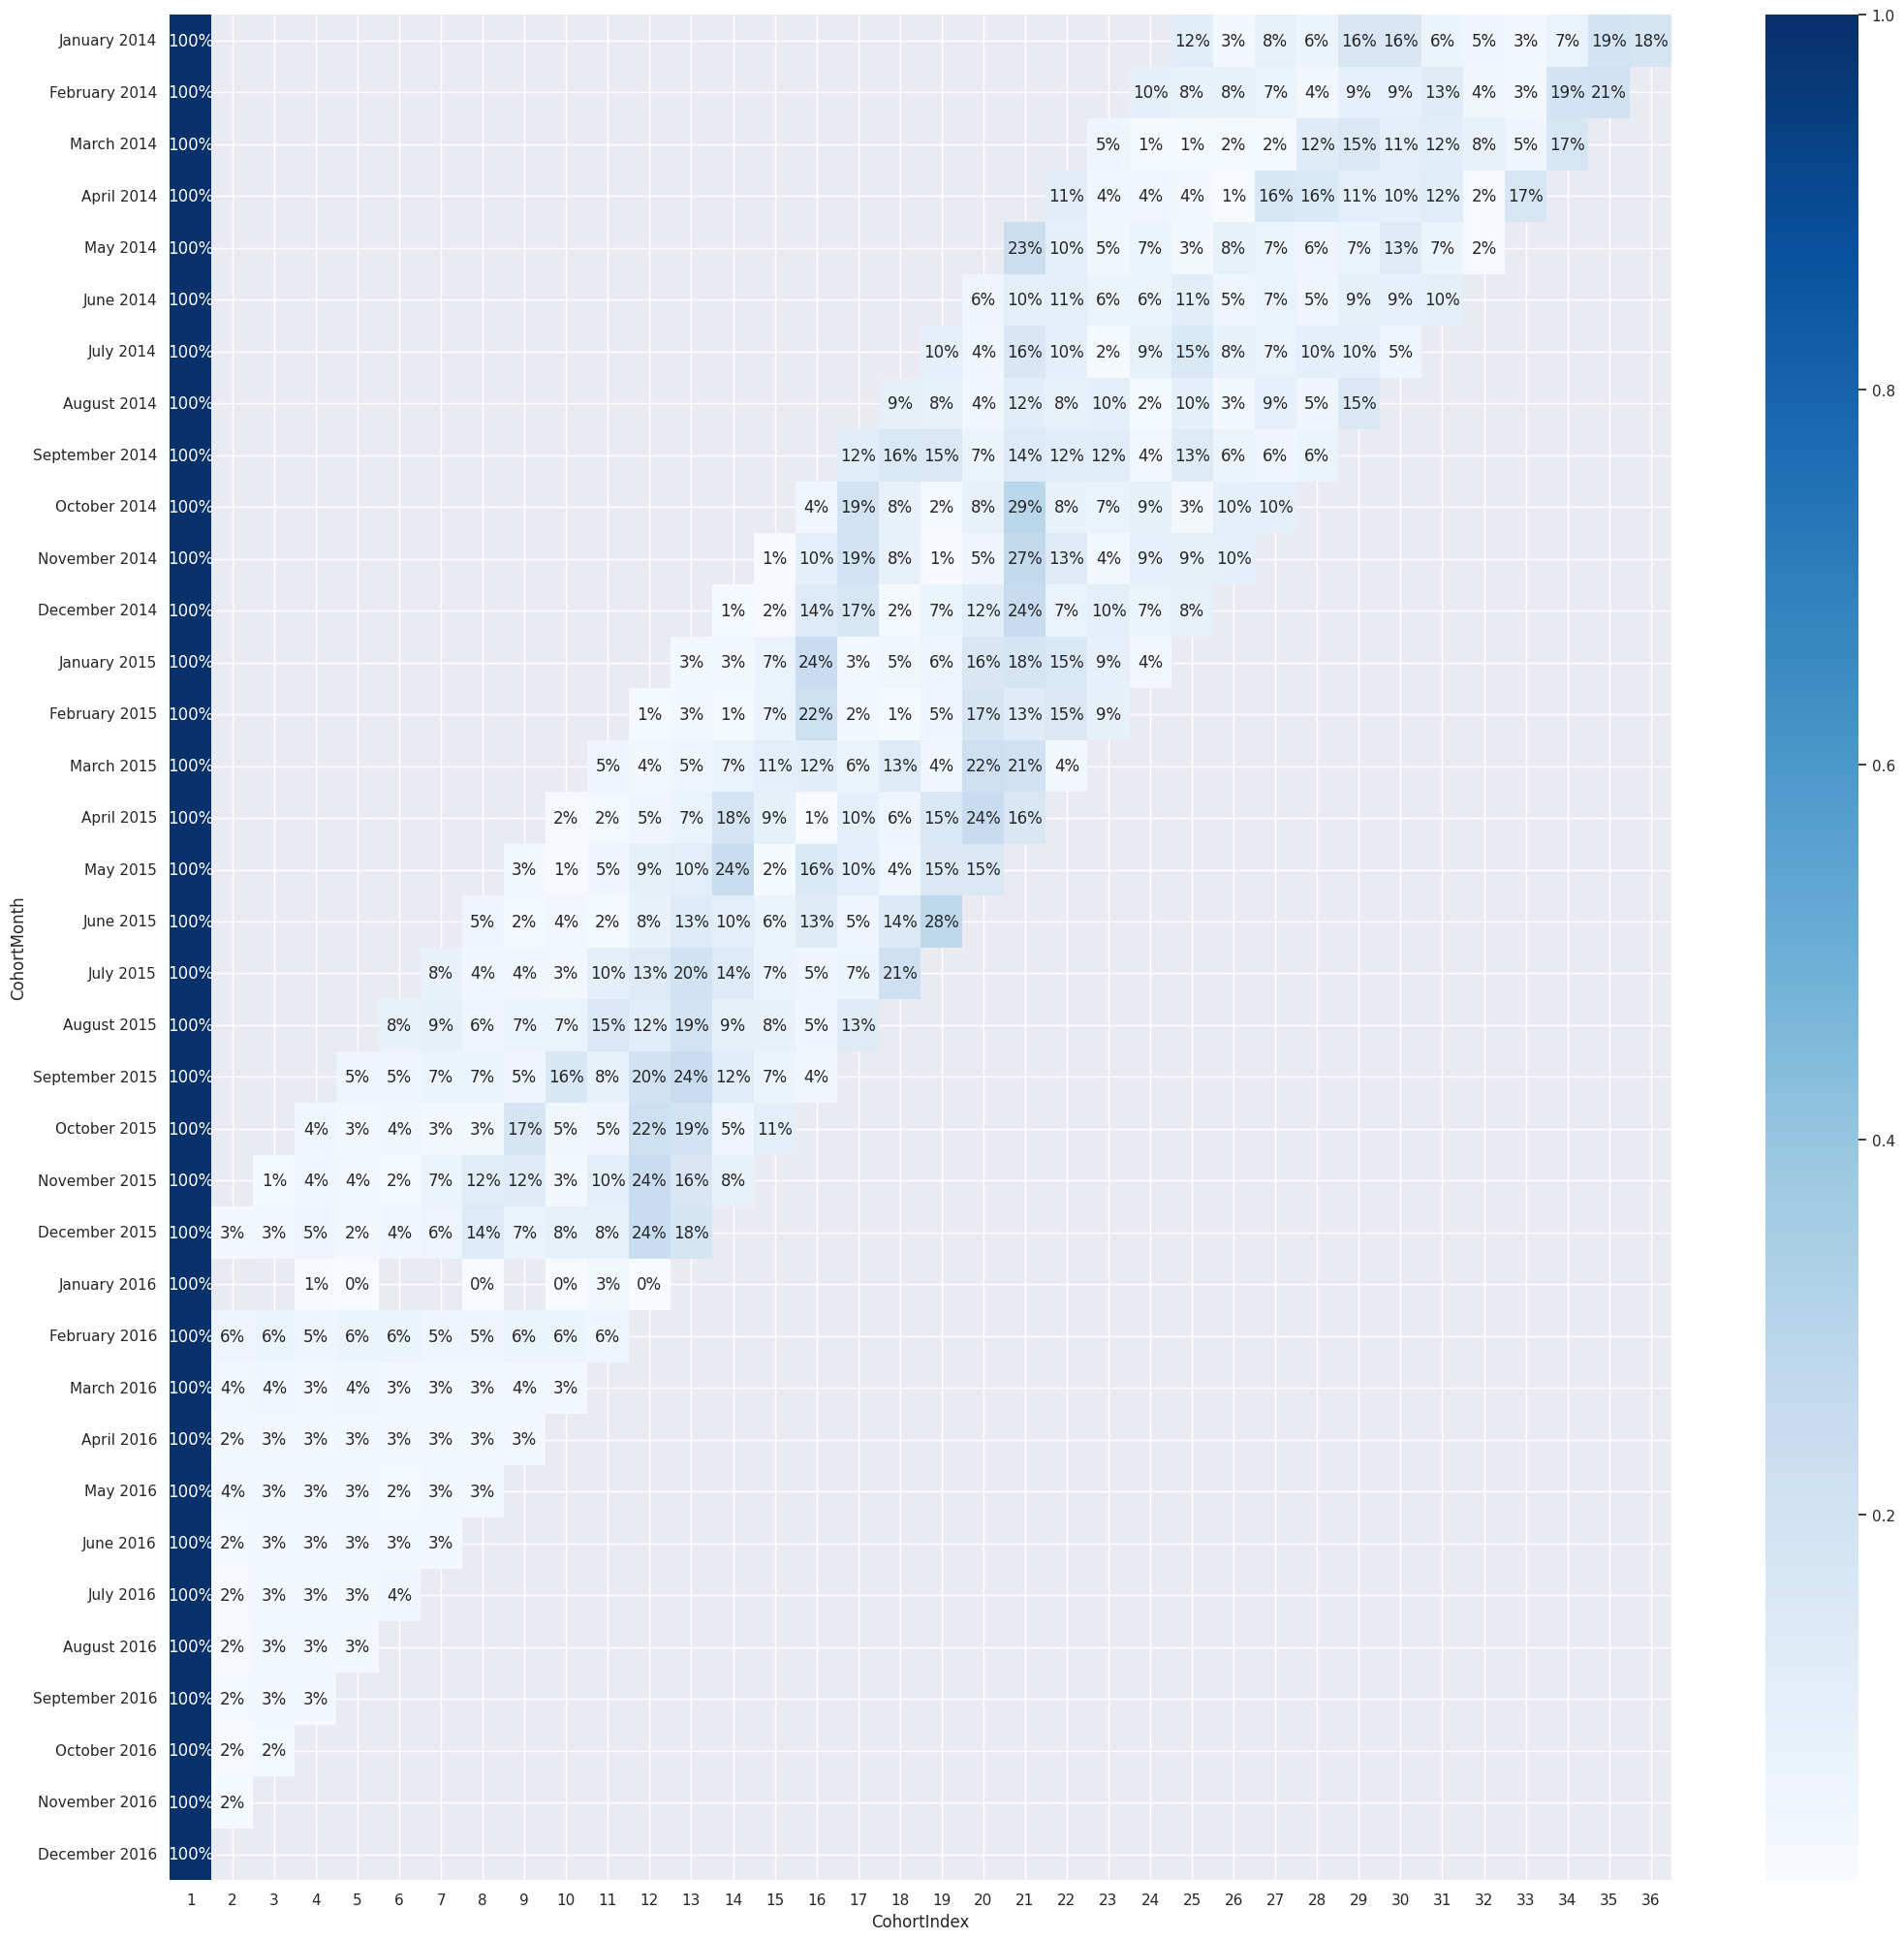

In [79]:
# create percentages
plt.figure(figsize=(25,25))
sns.heatmap(new_cohort_table, annot=True, cmap='Blues',fmt='.0%')

* We can infer from the heatmap above that client retention in 2014 was subpar
* Since August of 2015, we have noticed some customers returning, though not in large numbers
* 2016 brought about a slight improvement in retention